# lab1

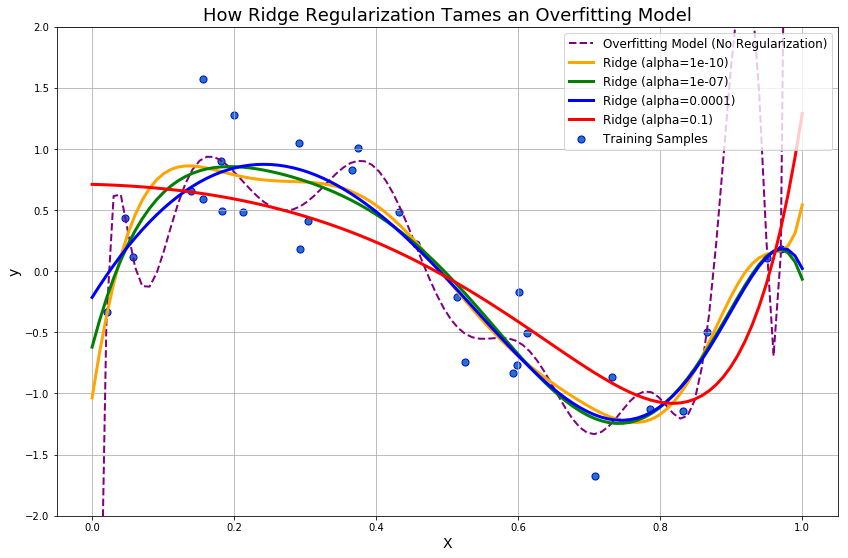


实验完成！请查看生成的图表 ridge_demonstration_practice_en.png


In [7]:
# student_lab_ridge.py
# -----------------------------------------------------------------------------
# 任务:
# 1. 定义制造过拟合所需的“多项式次数”和用于“驯服”模型的多个alpha值。
# 2. 亲手创建一个“失控”的过拟合模型。
# 3. 在循环中创建并训练不同强度的 Ridge 模型，以观察它们的效果。
# -----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# 准备数据
np.random.seed(42)
X = np.sort(np.random.rand(30))[:, np.newaxis]
y = np.sin(2 * np.pi * X).ravel() + np.random.randn(30) * 0.4
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]

plt.figure(figsize=(14, 9))
plt.scatter(X, y, edgecolor='b', s=50, label="Training Samples")

# ======================= TODO 1: 定义实验的核心参数 ==========================
# a. 定义一个较高的多项式次数，以确保能够制造出过拟合。
#    提示: 10 到 20 之间都是不错的选择。
degree = 15

# b. 定义一个包含多个 alpha 值的列表，用于对比不同强度的正则化效果。
#    提示: 列表可以包含一个很小的值，一个中等的值，和一个较大的值。
#    例如: [1e-7, 1e-3, 1]
alphas_to_try = [1e-10,1e-7,1e-4,1e-1]
# ===========================================================================


# =================== TODO 2: 创建并训练“失控”的过拟合模型 ====================
# 使用 make_pipeline 将 PolynomialFeatures 和 LinearRegression 串联起来。
model_overfit = make_pipeline( PolynomialFeatures(degree),LinearRegression())

model_overfit.fit(X,y)

# 下面的代码会画出它的曲线，无需修改
plt.plot(X_plot, model_overfit.predict(X_plot), color='purple', linestyle='--', linewidth=2, label="Overfitting Model (No Regularization)")
# ===========================================================================


# ================= TODO 3: 在循环中创建并训练多个Ridge模型 ==================
# 我们已经为你准备好了循环和绘图颜色
colors = ['orange', 'green', 'blue','red']
for alpha, color in zip(alphas_to_try, colors):
    # a. 创建一个 Ridge 回归模型。
    #    提示: 它同样需要用 make_pipeline 包含 PolynomialFeatures 和 Ridge。
    #    关键在于，要将当前的 alpha 值传给 Ridge 模型。
    model_ridge = make_pipeline( PolynomialFeatures(degree),Ridge(alpha))# 在这里填入模型步骤 )

    # b. 训练你刚刚创建的 Ridge 模型。
    #    提示: 同样是使用 .fit() 方法。
    # 在这里调用 .fit() 方法
    model_ridge.fit(X,y)
    # 下面的代码会画出它的曲线，无需修改
    y_plot = model_ridge.predict(X_plot)
    plt.plot(X_plot, y_plot, color=color, linewidth=3, label=f'Ridge (alpha={alpha})')
# ===========================================================================

# 展示图表
plt.title("How Ridge Regularization Tames an Overfitting Model", fontsize=18)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)
plt.ylim((-2, 2))
plt.savefig("ridge_demonstration_practice_en.png")
plt.show()

print("\n实验完成！请查看生成的图表 ridge_demonstration_practice_en.png")

# lab2

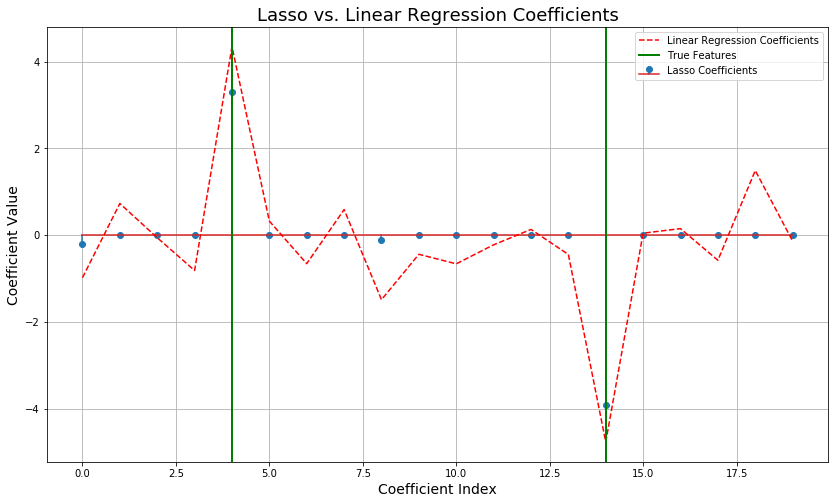

In [15]:
# student_lab.py
# -----------------------------------------------------------------------------
# 任务:
# 1. 训练一个普通的线性回归模型，看看它的表现。
# 2. 训练一个 Lasso 回归模型。
# 3. 通过对比两个模型的系数，找出那两个真正有用的特征
# -----------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso

np.random.seed(42)

# 生成100个样本，20个特征
n_samples, n_features = 100, 20
X = np.random.randn(n_samples, n_features)

# 真正相关的特征
true_coef = np.zeros(n_features)
true_coef[[4, 14]] = 5.0, -5.0 # 一个正相关，一个负相关
y = X @ true_coef + np.random.randn(n_samples) * 7.0 # X @ true_coef 是矩阵乘法


# ======================= TODO 1: 训练普通的线性回归 ==========================
# 训练一个 LinearRegression 模型，并将其赋值给变量 'lr'
lr = LinearRegression()# 在这里填入模型并训练它 (使用 .fit() 方法)
lr.fit(X,y)
# ===========================================================================

# ========================== TODO 2: 训练 Lasso 回归 ==========================
# 训练一个 Lasso 模型，并将其赋值给变量 'lasso'
# 提示: Lasso 需要一个 alpha 参数，alpha会影响最后的结果。
lasso = Lasso(alpha=0.95)# 在这里填入模型并训练它
lasso.fit(X,y)
# ===========================================================================

plt.figure(figsize=(14, 8))
# 绘制 Lasso 模型的系数
plt.stem(np.arange(n_features), lasso.coef_, markerfmt='o', label='Lasso Coefficients')
# 绘制 普通线性回归 模型的系数
plt.plot(np.arange(n_features), lr.coef_, 'r--', label='Linear Regression Coefficients')

# ==================== TODO 3: (挑战) 标记出真正的特征 ======================
# 使用 plt.axvline() 在图上画出两条垂直线，标记出真相所在的位置 (索引为4和14)。
plt.axvline(x=4,color='green',linestyle='-',linewidth=2,label='True Features')
plt.axvline(x=14,color='green',linestyle='-',linewidth=2)
# plt.axvline(...)
# plt.axvline(...)
# ===========================================================================

plt.title("Lasso vs. Linear Regression Coefficients", fontsize=18)
plt.xlabel("Coefficient Index", fontsize=14)
plt.ylabel("Coefficient Value", fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("lasso_feature_selection_en.png")